### Setting the task

There are two sets of key image points:
- a model set (which needs to be simulated);  
    
  - an introductory set (an input, test image that needs to be compared with the model set).  

It is necessary to determine the similarity of the images.

In [1]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

Pose comparison involves comparing poses containing key joint locations.  
Posture assessment is a computer vision task, and it is usually solved using deep learning approaches. During the posture assessment process, the position and orientation of body parts and joints is determined based on an image or sequence of images.  
In a scenario where you want to quantify the similarity between two poses in image `A` and image `B`, the following steps must be performed:
<ol>
<li><p>

Determine the information about the pose and identify the key location points (joints) in the image `A`.<p></li>
<li><p>

Determine the location of `x`, `y` of all the corresponding points needed for comparison. The Deep Learning solution for posture assessment usually provides information about the location of joints in a particular pose, as well as an assessment of the reliability of the assessment.</p></li>
<li><p>

Repeat steps 1 and 2 for image `B`.</p></li>
<li><p>

Convert all points `x`, `y` of the image `A` to a vector.</p></li>
<li><p>

All points `x`, `y` of the image `B` are converted to a vector.</p></li>
<li><p>Determine the cosine similarity between two vectors and get a number in the range from 0 to 1.</p></li>
</ol>
  
Cosine similarity is a metric that shows the cosine of the angle between two vectors projected into a multidimensional space. The smaller the angle between them, the more similar they are to each other.

In [2]:
# Picture visualization.  
def show_img(a=0, **images):
    plt.figure(figsize=(15,5))
    for idx, (name, image) in enumerate(images.items()): 
        title_pict = list(images.keys())[0]
        img = images[title_pict]
        plt.subplot(1, len(images), idx + 1)
        plt.xticks([]); plt.yticks([])
        plt.title(name.replace('_',' ').title(), fontsize=12);
        plt.imshow(image);
        plt.imshow(img, alpha=a);
    plt.show();

In [3]:
# Loading and preparing a pre-trained model keypointrcnn_resnet50_fpn.  
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(weights='DEFAULT')

keypoints = ['nose', 'left_eye', 'right_eye',
        'left_ear', 'right_ear', 'left_shoulder',
        'right_shoulder', 'left_elbow', 'right_elbow',
        'left_wrist', 'right_wrist', 'left_hip',
        'right_hip', 'left_knee', 'right_knee',
        'left_ankle', 'right_ankle']

def get_limbs_from_keypoints(keypoints):
    limbs = [
        [keypoints.index("right_eye"), 
        keypoints.index("nose")],
        [keypoints.index("right_eye"), 
        keypoints.index("right_ear")],
        [keypoints.index("left_eye"), 
        keypoints.index("nose")],
        [keypoints.index("left_eye"), 
        keypoints.index("left_ear")],
        [keypoints.index("right_shoulder"), 
        keypoints.index("right_elbow")],
        [keypoints.index("right_elbow"), 
        keypoints.index("right_wrist")],
        [keypoints.index("left_shoulder"), 
        keypoints.index("left_elbow")],
        [keypoints.index("left_elbow"), 
        keypoints.index("left_wrist")],
        [keypoints.index("right_hip"), 
        keypoints.index("right_knee")],
        [keypoints.index("right_knee"), 
        keypoints.index("right_ankle")],
        [keypoints.index("left_hip"), 
        keypoints.index("left_knee")],
        [keypoints.index("left_knee"), 
        keypoints.index("left_ankle")],
        [keypoints.index("right_shoulder"), 
        keypoints.index("left_shoulder")],
        [keypoints.index("right_hip"), 
        keypoints.index("left_hip")],
        [keypoints.index("right_shoulder"), 
        keypoints.index("right_hip")],
        [keypoints.index("left_shoulder"), 
        keypoints.index("left_hip")],
    ]
    return limbs

limbs = get_limbs_from_keypoints(keypoints)

Let's determine that we will add the suffix `"mdl"` to the variables of the model image, and to the test image (input image) - suffix `"tst"`.

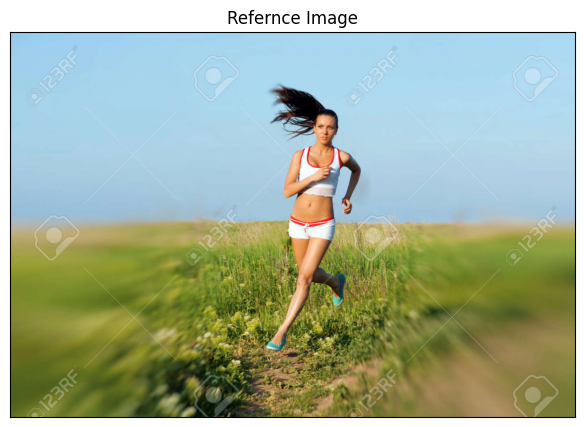

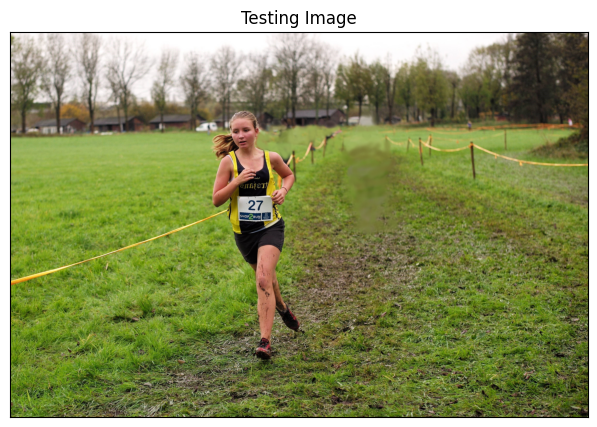

In [4]:
# The path to the image. 
mdl_pict_path ="../images/running_girl_ref.png"
tst_pict_path ="../images/kross-2.jpeg"

# Loading a reference image and converting it to RGB format. 
mdl_pict = cv2.imread(mdl_pict_path)

# Uploading a test image and converting it to RGB format.  
tst_pict = cv2.imread(tst_pict_path)

# Transformation - obtaining an image tensor.  
transform = transforms.Compose([transforms.ToTensor()])
mdl_tensor = transform(mdl_pict)
tst_tensor = transform(tst_pict)

# Output of the original and test images.  
show_img(
   refernce_image = mdl_pict[:,:,::-1])
show_img(
   testing_image = tst_pict[:,:,::-1])

In [5]:
# Preparing the model for the inference. 
model.eval();

# Running the image through the model.  
with torch.no_grad():
    out_mdl = model([mdl_tensor])[0]
    out_tst = model([tst_tensor])[0]

out_mdl

{'boxes': tensor([[596.8143, 172.3236, 807.4850, 741.4597],
         [496.9932, 396.7905, 525.2551, 434.5749]]),
 'labels': tensor([1, 1]),
 'scores': tensor([0.9998, 0.0771]),
 'keypoints': tensor([[[724.2095, 230.4552,   1.0000],
          [736.3423, 221.5970,   1.0000],
          [716.4885, 217.1680,   1.0000],
          [750.6812, 226.0261,   1.0000],
          [702.1497, 222.7043,   1.0000],
          [762.8140, 288.0332,   1.0000],
          [667.9570, 284.7113,   1.0000],
          [795.9037, 319.0367,   1.0000],
          [640.3823, 364.4347,   1.0000],
          [778.2559, 379.9365,   1.0000],
          [702.1497, 336.7530,   1.0000],
          [719.7975, 447.4799,   1.0000],
          [661.3391, 446.3726,   1.0000],
          [675.6779, 564.8503,   1.0000],
          [686.7078, 560.4213,   1.0000],
          [626.0435, 689.9717,   1.0000],
          [747.3722, 577.0303,   1.0000]],
 
         [[516.0156, 404.8871,   1.0000],
          [518.1896, 403.8076,   1.0000],
         

In [6]:
# Let's collect two sets of key points.  
mdl_keys = out_mdl['keypoints'][0][:, :2].numpy()
tst_keys = out_tst['keypoints'][0][:, :2].numpy()

# pad and unpad to add and remove 1 at the end of the matrix. 
pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])
unpad = lambda x: x[:, :-1]
X = pad(tst_keys)
Y = pad(mdl_keys)

Let's solve the least squares problem `X * A = Y` and find the affine transformation matrix `A'.

In [7]:
A, res, rank, s = np.linalg.lstsq(X, Y, rcond=None)

# Converting too small values to "0".  
A[np.abs(A) < 1e-10] = 0  

# Now that we have found the extended matrix A,
# we can transform the input set of key points. 
transform = lambda x: unpad(np.dot(pad(x), A))
keypoints_transformed = transform(tst_keys)

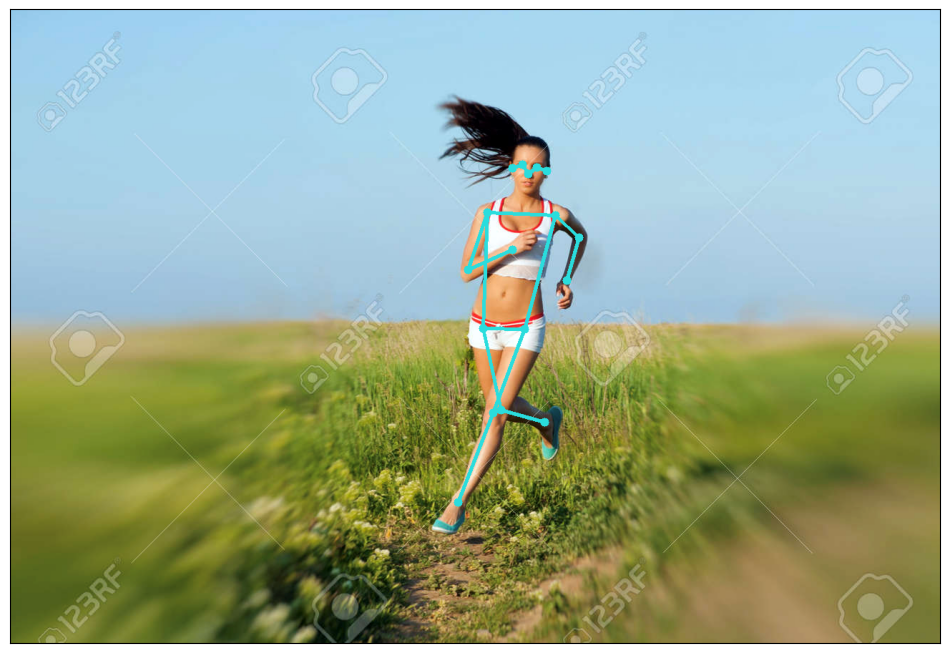

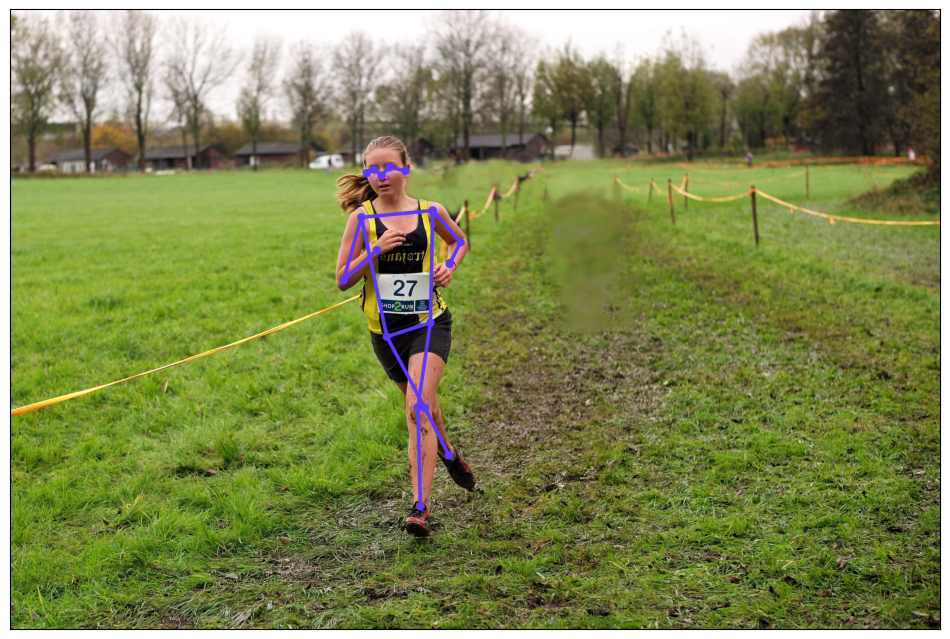

In [8]:
def draw_skeleton_per_person(
            img, all_keypoints, all_scores, confs, 
            keypoint_threshold=2, conf_threshold=0.9,
            thickness=2, rd=5, th=2):    

    cmap = plt.get_cmap('rainbow')
    img_copy = img.copy()
    color_id = (np.linspace(0, 255, len(all_keypoints)+2).astype(int).tolist()[1:-1])

    if len(all_keypoints)>0:
      
      for person_id in range(len(all_keypoints)):
          if confs[person_id]>conf_threshold:
            keypoints = all_keypoints[person_id, ...]
            scores = all_scores[person_id, ...]
            color = tuple(np.asarray(cmap(color_id[person_id])[:-1])*255)
            
            for kp in range(len(scores)):
                if scores[kp] > keypoint_threshold:
                    keypoint = tuple(map(int, keypoints[kp, :2])) 
                    cv2.circle(img_copy, keypoint, rd, color, -1)
            
            for limb_id in range(len(limbs)):
              limb_loc1 = tuple(map(int, keypoints[limbs[limb_id][0], :2])) 
              limb_loc2 = tuple(map(int, keypoints[limbs[limb_id][1], :2])) 
              limb_score = min(all_scores[person_id, limbs[limb_id][0]], all_scores[person_id, limbs[limb_id][1]])
              if limb_score> keypoint_threshold:
                cv2.line(img_copy, limb_loc1, limb_loc2, color, thickness=th)

    return img_copy

skeletal_mdl = draw_skeleton_per_person(
    mdl_pict[:,:,::-1], 
    out_mdl['keypoints'],
    out_mdl["keypoints_scores"], 
    out_mdl["scores"],
    rd=6, th=3) 
  
skeletal_tst = draw_skeleton_per_person(
    tst_pict[:,:,::-1], 
    out_tst['keypoints'],
    out_tst["keypoints_scores"], 
    out_tst["scores"],
    rd=20,
    th=15
    )

fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(skeletal_mdl)
plt.xticks([]); plt.yticks([])
plt.show(); 

fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(skeletal_tst)
plt.xticks([]); plt.yticks([])
plt.show(); 


In [9]:
def conv(array):
    for i in ['keypoints', 'scores', 'keypoints_scores']:
        if str(type(array[i])) != "<class 'numpy.ndarray'>":
            array[i] = array[i].numpy()
    return array

The model image uses the best data stored at index 0. One way to view the frame of the model image and the transformed frame of the test image at the same time is to record the best parameters of the test image in the model image at an unused index 1. You can also get a similar result using other methods, for example, using a dictionary with three keys a list of lists, but in my opinion, these are unnecessary gestures.

In [10]:
# Запись преобразованных точек изображения в картинку-модель по неиспользуемому индексу.  
conv(out_mdl)['keypoints'][1] = pad(keypoints_transformed)

# Запись наилучших весов картинки-теста в картинку-модель по неиспользуемому индексу.  
out_mdl['keypoints_scores'][1] = conv(out_tst)['keypoints_scores'][0]

# Установка в 1 всех весов картинки-модели по неиспользуемому индексу.  
out_mdl['scores'][1] = 1

# Подготовка массива изображения для вывода.  
skeletal_mdl = draw_skeleton_per_person(
    mdl_pict[:,:,::-1], 
    out_mdl['keypoints'],
    out_mdl["keypoints_scores"], 
    out_mdl["scores"],
    rd=6,
    th=3) 

Using the affine transformation function `cv2` for two images, we transform the pose of the test image in such a way that it is as similar as possible to the pose of the model image. In this case, we use the array of the test image, the affine transformation matrix, and the dimensions of the model image.

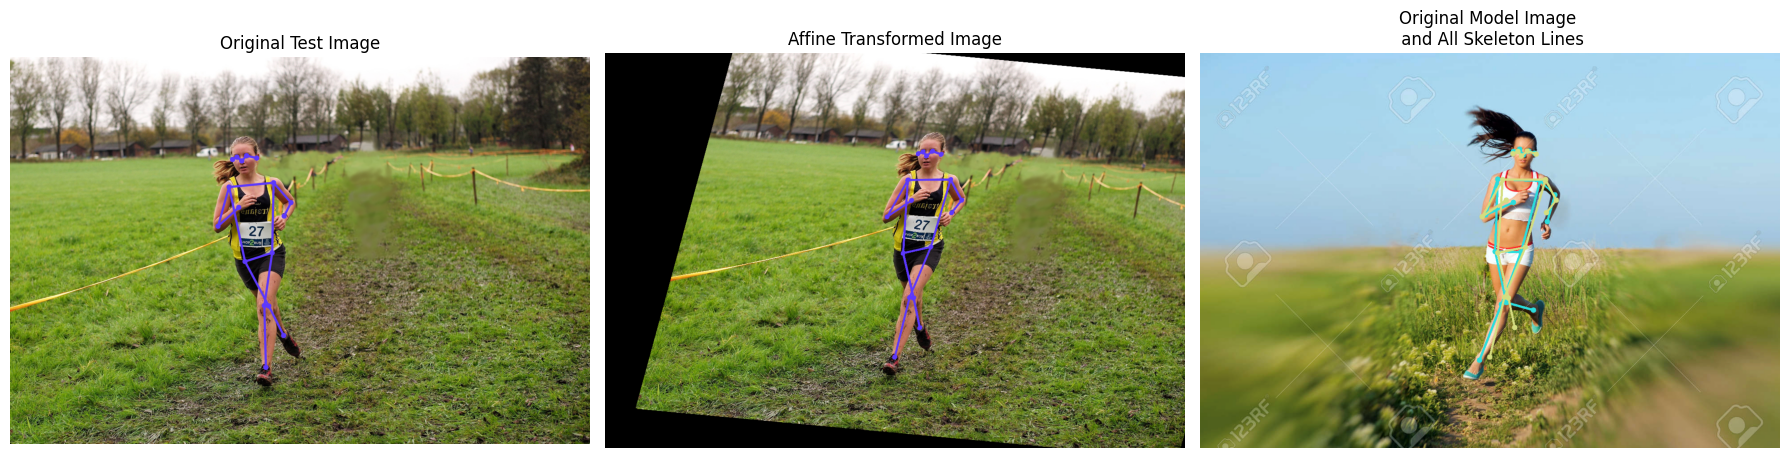

In [14]:
affin_trans = cv2.warpAffine(
    skeletal_tst, A[:,:2].T, (mdl_pict.shape[1], mdl_pict.shape[0]))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18, 15)) 
[ax.set_axis_off() for ax in (ax1,ax2,ax3)]
ax1.imshow(skeletal_tst);
ax2.imshow(affin_trans);
ax3.imshow(skeletal_mdl);
ax1.set_title('Original Test Image')
ax2.set_title('Affine Transformed Image')
ax3.set_title('Original Model Image \n and All Skeleton Lines');
plt.tight_layout();

Before calculating the cosine similarity, it is necessary to center the image arrays. An image array is a three-dimensional array of numbers from 0 to 255. To increase stability, that is, to get rid of the problems of vanishingly small or saturated values, it is necessary to carry out centering. Centering allows you to bring values to the same range, simplifying data analysis and comparison. After centering, the average value of the array becomes zero.  
Calculating the centering:
$$M_c = M - \overline{M}$$  
  
Cosine similarity is an indicator used to measure how similar two vectors are in a multidimensional space. Mathematically, this indicator measures the cosine of the angle between the vectors. Cosine similarity can be determined using the scalar product and the norm:
$$similarity = cos{θ} = \dfrac{A \cdot B}{||A||\;\;||B||} $$  
Cosine similarity takes values in the range from 0 to 1. The closer to 0, the more orthogonal the vectors are. The closer to 1, the smaller the angle and the more similar the images are.

First, we perform the calculation using our own functions.

In [15]:
# Centering function with the conversion of an array into a vector. 
def center(X, F=True):
    newX = X - np.mean(X, axis = 0)
    newX = newX.flatten() if F else newX
    return newX

# Cosine similarity calculation function.
def cosine_similarity(pose1, pose2):
    pose1, pose2 = [center(i) for i in [pose1, pose2]]
    return np.dot(pose1, pose2.T) / (np.linalg.norm(pose1)*np.linalg.norm(pose2))


In [16]:
# Weighted cosine similarity calculation function. 
def weighted_distance(pose1, pose2, confs):
    # Centering.  
    pose1, pose2 = [center(i, False) for i in [keypoints_transformed, mdl_keys]]

    # Normalization
    pose1, pose2 = [i/np.linalg.norm(i) for i in [pose1, pose2]]

    # Summation of weighted distances between keypoints 
    sum = 0
    for k in range(len(pose1)):
        sum += (confs[k] 
        * np.linalg.norm(pose1[k]-pose2[k]))

    return sum / confs.sum()

W = np.sqrt(conv(out_mdl)['keypoints_scores'][0] 
            * conv(out_tst)['keypoints_scores'][0])
print(f'Cosine similarity: {cosine_similarity(keypoints_transformed, mdl_keys):.4f}')
print(f'Cosine distance: {1-cosine_similarity(keypoints_transformed, mdl_keys):.4f}\n')
print(f'Weighted similarity: {1-weighted_distance(keypoints_transformed, mdl_keys, W):.4f}')
print(f'Weighted distance: {weighted_distance(keypoints_transformed, mdl_keys, W):.4f}')

Cosine similarity: 0.9924
Cosine distance: 0.0076

Weighted similarity: 0.9807
Weighted distance: 0.0193


Now let's do the calculation using the `scipy` library.

In [17]:
from scipy.spatial.distance import cosine

# Centering.  
pose1, pose2 = [center(i) for i in [keypoints_transformed, mdl_keys]]

# Normalization.
pose1, pose2 = [i/np.linalg.norm(i) for i in [pose1, pose2]]

# Calculation of weights.  
w = np.sqrt(conv(out_mdl)['keypoints_scores'][0] *
                  conv(out_tst)['keypoints_scores'][0])

ws = []
for i in w.tolist():
    ws.append(i)
    ws.append(i)

weights = np.array(ws)
print(f'Cosine similarity: {1-cosine(pose2, pose1):.4f}')
print(f'Cosine distance: {cosine(pose2, pose1):.4f}\n')

print(f'Weighted similarity: {1-cosine(pose2, pose1, weights):.4f}')
print(f'Weighted distance: {cosine(pose2, pose1, weights):.4f}')

Cosine similarity: 0.9924
Cosine distance: 0.0076

Weighted similarity: 0.9939
Weighted distance: 0.0061
